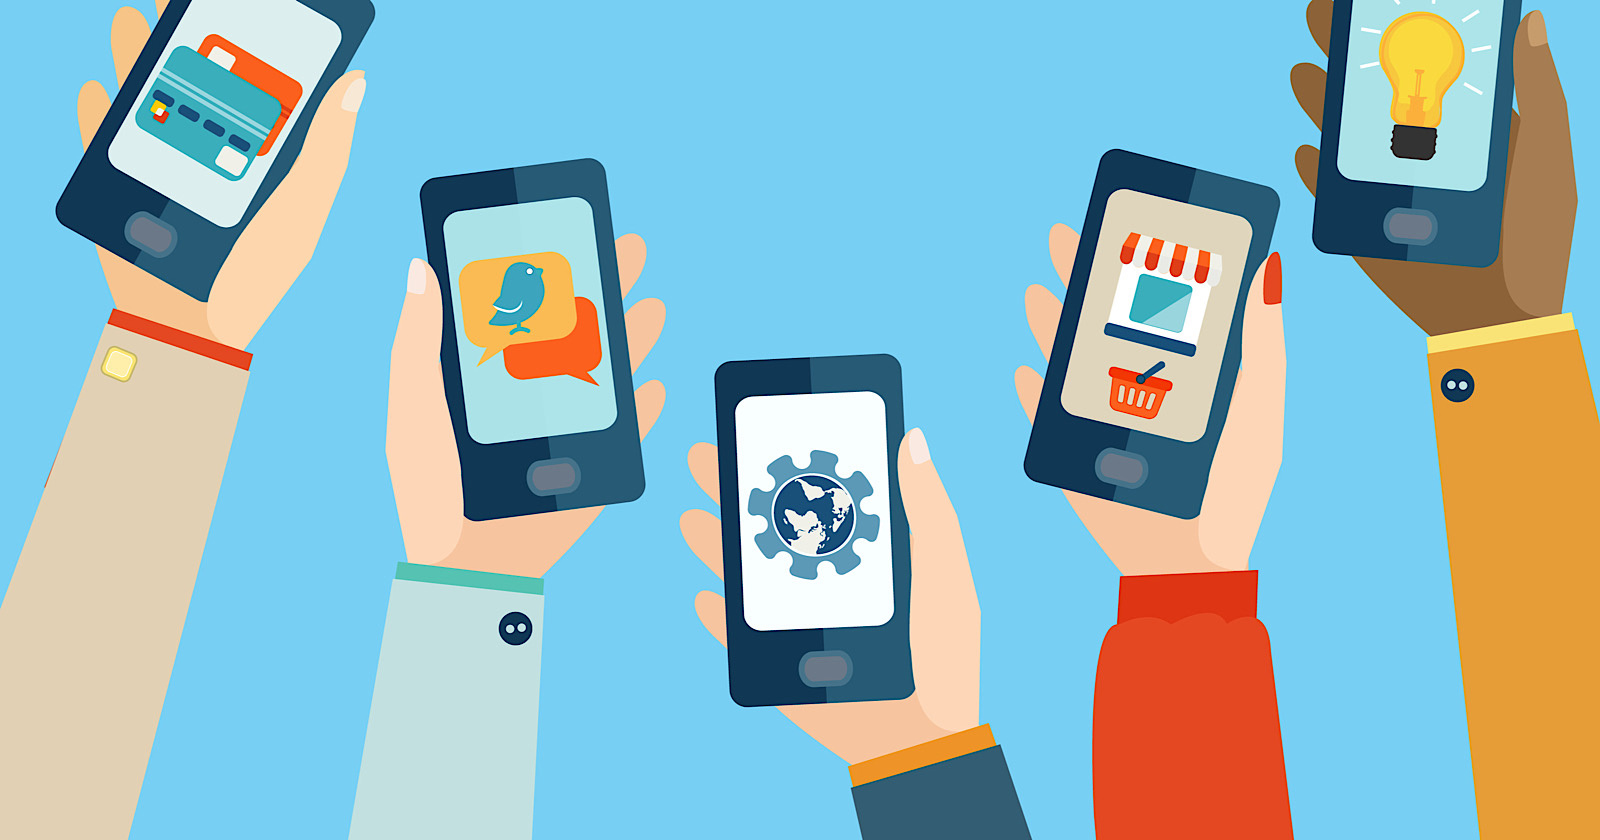

<h1 style="text-align:center">MobileInsight - Predicting and Optimizing User Experience</h1>

<p style="text-align:center";> By Gaurav Dnyanesh Mahajan </p>

## Motivation

Phones! Mobiles! Smartphones! In today's digital age, mobile phones have become indispensable in our lives. From calls and chats to banking and booking tickets for almost everything, mobile phones are at the core of human interaction and productivity. Generation Z stands out as the first true ***digital natives***. With smartphones becoming more handsy and intelligent, our dependence on them has increased manifold. Attention spans, behavior patterns, and mental health have been linked to device usage and behavior. 

A ton of researchers claim that lasting mental and physiological effects such as eye pains and strains, body aches in young adults and kids, stress, anxiety and depression, eating disorders, and a sedentary lifestyle are linked to excessive phone usage. (A few extra reading resources have been linked in the Reference section.)

Can we eradicate phones from our lives? We cannot imagine to do so. Can we as users create healthy mobile ecosystems? Can organizations and manufacturers ameliorate user experiences? And ultimately, can we use data science to find the solutions to these questions?

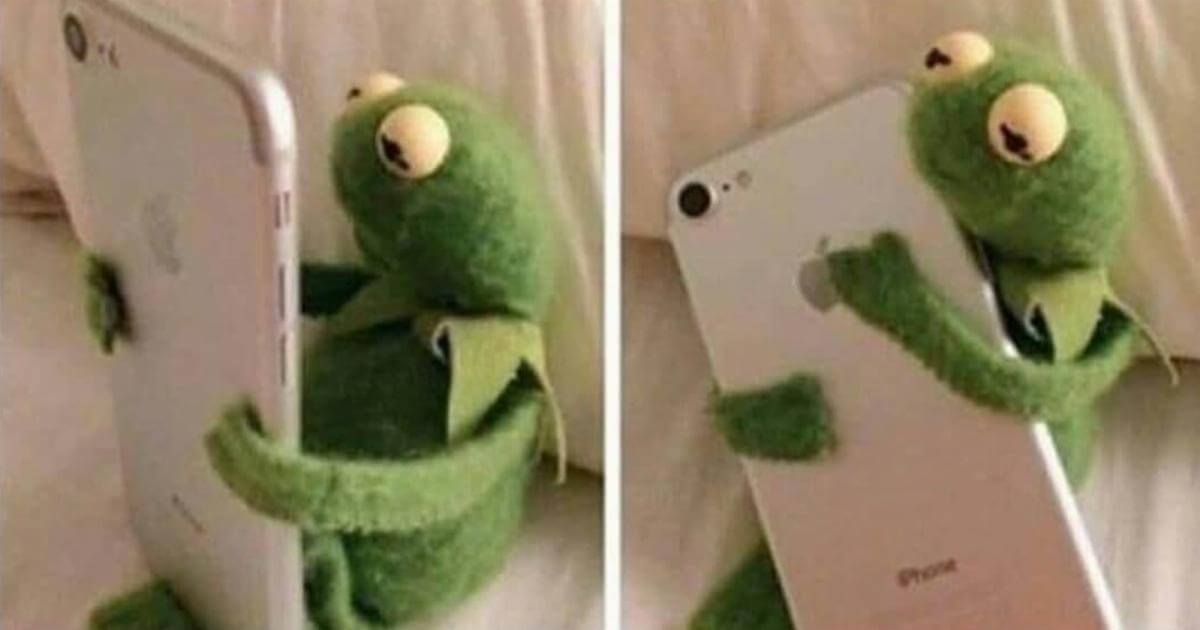

## Table of Contents1. [Introduction](#1.-Introduction)
2. [Data Collection](#2.-Data-Collection)
3. [Data Cleaning & Exploratory Analysis](#3.-Data-Scrubbing-and-Exploratory-Data-Analysis)
4. [Model Training](#4.-Model-Training)
5. [Interpretation of results](#5.-Interpretation-of-Results)
6. [Conclusion](#6.-Conclusion)
7. [References](#7.-References)
8. [Glossary](#8.-Glossary)

### 1. Introduction

The purpose of this tutorial is to walk you through the data science lifecycle and encounter a plethora of data science concepts that help researchers, organizations, and everyone to make sound and informed decisions. Let's understand what steps the lifecycle entails:

1. Data collection
2. Data scrubbing
3. Data Exploration (EDA and Data Vizualization)
4. Model Analysis and Testing
5. Interpretation of results  

The purpose of the data science lifecycle is to facilitate a proper, legitimate, and structured way of identifying trends or patterns and investigating to answer a question or solve a problem. This tutorial will focus on understanding user behavior and patterns of mobile device usage, aiming to uncover actionable insights.

This tutorial aims to explore the following key questions:
1. How can we classify users based on their mobile usage behavior?
2. Can we predict the app usage patterns to better understand user engagement?
3. Can we deduce factors such as battery drain, and how can they be optimized?

By finding or rather trying to find answers to these questions, we can come up with strategies and solutions to have healthier and sustainable smartphone ecosystems and provide reasonable and actionable recommendations for both users and developers to improve battery efficiency and overall device performance.

### 2. Data Collection

The first step is to collect the data necessary to answer our question or any other data science problem. It is quite important to find an appropriate dataset for your situation. The machine learning model will be reflective of the quality of the data you feed it. The model will use the same dataset to derive its conclusions.

There are different ways of collecting data. The five most popular techniques for collecting data are as follows:
1. Direct download from the web
2. Generate data locally
3. Query data using APIs
4. Query data from a database
5. Web Scraping

<center>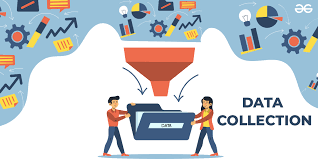</center>

#### Import Python Libraries

To begin this tutorial, we first need to import the necessary Python libraries (as shown below), which will be used for this tutorial. You should use Jupyter Notebook, as most of the code provided is run in Jupyter Notebook. Jupyter Notebook is also widely used by data scientists, as it allows better visualization of our data and other analyses.

In [1]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
# Filter out the warnings 
import warnings
warnings.filterwarnings('ignore')

#### Download and import data

Navigate to [Mobile Device Usage and User Behavior Dataset](https://www.kaggle.com/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset/data) and download the .csv file. **Make sure you move it to the same directory/folder** as the one in which you are running your Jupyter Notebook. The dataset is open source and you can use it to do your analyses and run your models.

Let's use [Pandas DataFrames](https://pandas.pydata.org/about/) to read in this .csv file as Pandas is a very useful tool to help with manipulating and analyzing data tables using Python.

In [2]:
#Read in the .csv file
df=pd.read_csv('user_behavior_dataset.csv')

#### Understanding Data

Before we start making changes to our data, it's necessary to see our data and understand what information is actually present. Before, attacking the dataset, let's take some time to look over it, and note that each row is recorded information for one mobile user.

In [3]:
#Print the head of the table
df.head()

User ID    Device Model Operating System  App Usage Time (min/day)   
0        1  Google Pixel 5          Android                       393  \
1        2       OnePlus 9          Android                       268   
2        3    Xiaomi Mi 11          Android                       154   
3        4  Google Pixel 5          Android                       239   
4        5       iPhone 12              iOS                       187   

   Screen On Time (hours/day)  Battery Drain (mAh/day)   
0                         6.4                     1872  \
1                         4.7                     1331   
2                         4.0                      761   
3                         4.8                     1676   
4                         4.3                     1367   

   Number of Apps Installed  Data Usage (MB/day)  Age  Gender   
0                        67                 1122   40    Male  \
1                        42                  944   47  Female   
2                        32                  322   42    Male   
3                        56                  871   20    Male   
4                        58                  988   31  Female   

   User Behavior Class  
0                    4  
1                    3  
2                    2  
3                    3  
4                    3

So, what do these columns mean?
- User ID: Unique identifier for each user.
- Device Model: Model of the user's smartphone.
- Operating System: The OS of the device (iOS or Android).
- App Usage Time: Daily time spent on mobile applications, measured in minutes.
- Screen On Time: Average hours per day the screen is active.
- Battery Drain: Daily battery consumption in mAh.
- Number of Apps Installed: Total apps available on the device.
- Data Usage: Daily mobile data consumption in megabytes.
- Age: Age of the user.
- Gender: Gender of the user (Male or Female)

### 3. Data Scrubbing and Exploratory Data Analysis

Now that we have seen our data, the next step is to clean our data. Literally, we are going to scrub the data off to remove most of the impurities. ***What does it mean to clean/scrub our data?*** It means we need to make necessary changes to our data to make it ready to be processed for making correct analyses and also for our models. This process may involve many different things, some examples are:

    - Deleting necessary data
    - Filling in missing data
    - Changing the values or metrics/measurements of our data
    - Calculating new and more convenient features from existing data

Since these processes are very data-dependent, there cannot be any set strategy or proper hierarchy of processes to clean our data. It all depends on the quality of the dataset and type of the data you are working with. 

If you noticed we are combining Data cleaning & Exploratory Analysis because they go hand-in-hand most of the time. Sometimes, it becomes necessary to perform some kind of EDA to know what cleaning steps are required. In some situations, we need to clean the data and check whether we are able to derive insights from the data using EDA.

In simple terms, exploratory analyss, is performing any sort of analysis on your dataset before we pass it into the machine learning model. This process may involve creating graphs comparing features or plotting a certain data point. Essentially, we are trying to get some insight into our dataset before passing it into the machine learning model, making any predictio,ns or identifying any trends, which may helinterpretng our results. This analysis may also help guide our question or research, as mentioned earlier, where we may notice one feature is significant in some sort of way.

<center><img src='https://techvify-software.com/wp-content/uploads/2023/10/process-of-data-cleaning-1.png'/></center>

In [4]:
# List out information about each of the features of the table
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


As we notice, there are no null values present, so we need not remove any observation or impute any data.

In [5]:
# Displaying the count of unique values for every column
df.nunique()

User ID                       700
Device Model                    5
Operating System                2
App Usage Time (min/day)      387
Screen On Time (hours/day)    108
Battery Drain (mAh/day)       628
Number of Apps Installed       86
Data Usage (MB/day)           585
Age                            42
Gender                          2
User Behavior Class             5
dtype: int64

We notice that we have 5 unique models and 2 unique operating systems. Also, we have 5 classes of user behavior.

In [6]:
# Renaming columns to remove spaces and avoid unnecessary confusion
df.columns = [
    'user_id',
    'device_model',
    'operating_system',
    'app_usage_time_min_per_day',
    'screen_on_time_hours_per_day',
    'battery_drain_mAh_per_day',
    'number_of_apps_installed',
    'data_usage_MB_per_day',
    'age',
    'gender',
    'user_behavior_class'
]

In [7]:
#Displaying the renamed columns
df.head()

user_id    device_model operating_system  app_usage_time_min_per_day   
0        1  Google Pixel 5          Android                         393  \
1        2       OnePlus 9          Android                         268   
2        3    Xiaomi Mi 11          Android                         154   
3        4  Google Pixel 5          Android                         239   
4        5       iPhone 12              iOS                         187   

   screen_on_time_hours_per_day  battery_drain_mAh_per_day   
0                           6.4                       1872  \
1                           4.7                       1331   
2                           4.0                        761   
3                           4.8                       1676   
4                           4.3                       1367   

   number_of_apps_installed  data_usage_MB_per_day  age  gender   
0                        67                   1122   40    Male  \
1                        42                    944   47  Female   
2                        32                    322   42    Male   
3                        56                    871   20    Male   
4                        58                    988   31  Female   

   user_behavior_class  
0                    4  
1                    3  
2                    2  
3                    3  
4                    3

Changing column names helps us make our further operations less lousy and prone to errors.

In [8]:
#Displaying statistical information for numerical columns
df.describe()

user_id  app_usage_time_min_per_day  screen_on_time_hours_per_day   
count  700.00000                  700.000000                    700.000000  \
mean   350.50000                  271.128571                      5.272714   
std    202.21688                  177.199484                      3.068584   
min      1.00000                   30.000000                      1.000000   
25%    175.75000                  113.250000                      2.500000   
50%    350.50000                  227.500000                      4.900000   
75%    525.25000                  434.250000                      7.400000   
max    700.00000                  598.000000                     12.000000   

       battery_drain_mAh_per_day  number_of_apps_installed   
count                 700.000000                700.000000  \
mean                 1525.158571                 50.681429   
std                   819.136414                 26.943324   
min                   302.000000                 10.000000   
25%                   722.250000                 26.000000   
50%                  1502.500000                 49.000000   
75%                  2229.500000                 74.000000   
max                  2993.000000                 99.000000   

       data_usage_MB_per_day         age  user_behavior_class  
count             700.000000  700.000000           700.000000  
mean              929.742857   38.482857             2.990000  
std               640.451729   12.012916             1.401476  
min               102.000000   18.000000             1.000000  
25%               373.000000   28.000000             2.000000  
50%               823.500000   38.000000             3.000000  
75%              1341.000000   49.000000             4.000000  
max              2497.000000   59.000000             5.000000

We can observe some statistical descriptions in our columns. Columns as user IDs even though numerical, its statistics do not matter to us much. You can observe the average of app usage time, screen time, battery drain, number of apps installed, and data usage.

In [9]:
# Drop user id column
df.drop(["user_id"], axis=1, inplace=True)

In [10]:
#Checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   device_model                  700 non-null    object 
 1   operating_system              700 non-null    object 
 2   app_usage_time_min_per_day    700 non-null    int64  
 3   screen_on_time_hours_per_day  700 non-null    float64
 4   battery_drain_mAh_per_day     700 non-null    int64  
 5   number_of_apps_installed      700 non-null    int64  
 6   data_usage_MB_per_day         700 non-null    int64  
 7   age                           700 non-null    int64  
 8   gender                        700 non-null    object 
 9   user_behavior_class           700 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 54.8+ KB


In [11]:
#Displaying numerical columns excluding the class
numerical_columns = [col for col in df.select_dtypes(include=['number']).columns if col != 'User Behavior Class']
numerical_columns

['app_usage_time_min_per_day',
 'screen_on_time_hours_per_day',
 'battery_drain_mAh_per_day',
 'number_of_apps_installed',
 'data_usage_MB_per_day',
 'age',
 'user_behavior_class']

In [12]:
#Displaying categorical columns and unique values
categorical_columns=df.select_dtypes(include=['object','category'])
for col in categorical_columns:
    print(f'{col}: {df[col].unique()}')

device_model: ['Google Pixel 5' 'OnePlus 9' 'Xiaomi Mi 11' 'iPhone 12'
 'Samsung Galaxy S21']
operating_system: ['Android' 'iOS']
gender: ['Male' 'Female']


We see the 5 unique models here: **Google Pixel 5, OnePlus 9, Xiaomi Mi 11, iPhone 12,
and 'Samsung Galaxy S2**\
Obviously, the 2 operating systems would be: **Android** and **iOS**'

In [13]:
#Checking distribution of users device-wise, operating system-wise and gender-wise
for col in categorical_columns:
  print(f'{df[col].value_counts()}')
  

device_model
Xiaomi Mi 11          146
iPhone 12             146
Google Pixel 5        142
OnePlus 9             133
Samsung Galaxy S21    133
Name: count, dtype: int64
operating_system
Android    554
iOS        146
Name: count, dtype: int64
gender
Male      364
Female    336
Name: count, dtype: int64


Let's start with some Exploratory Data Analysis and visualize what the data is trying to tell us.

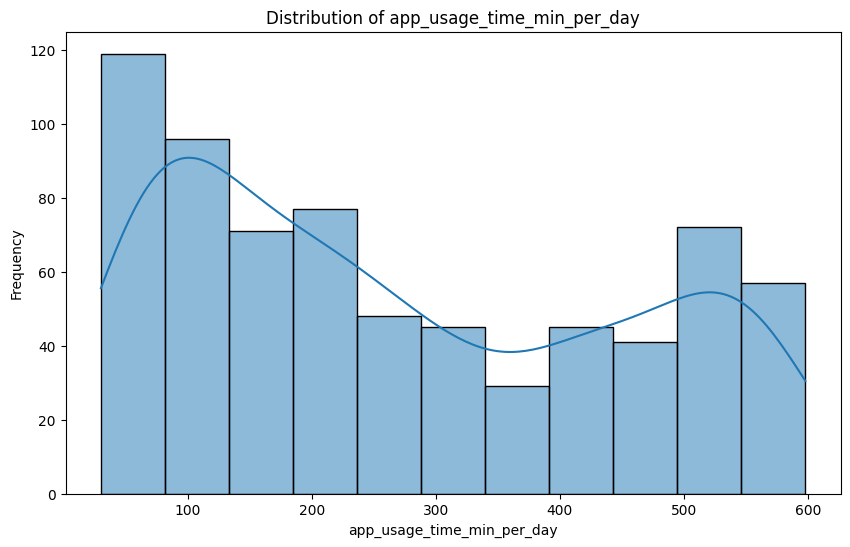

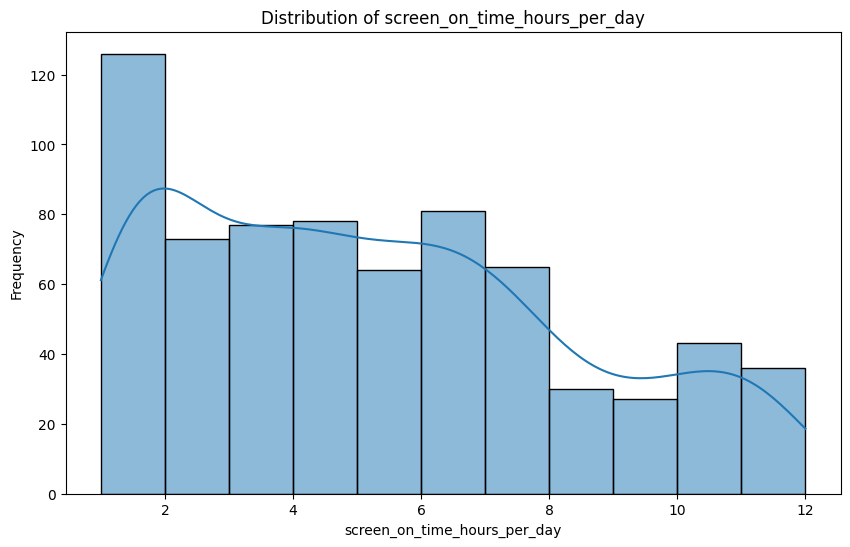

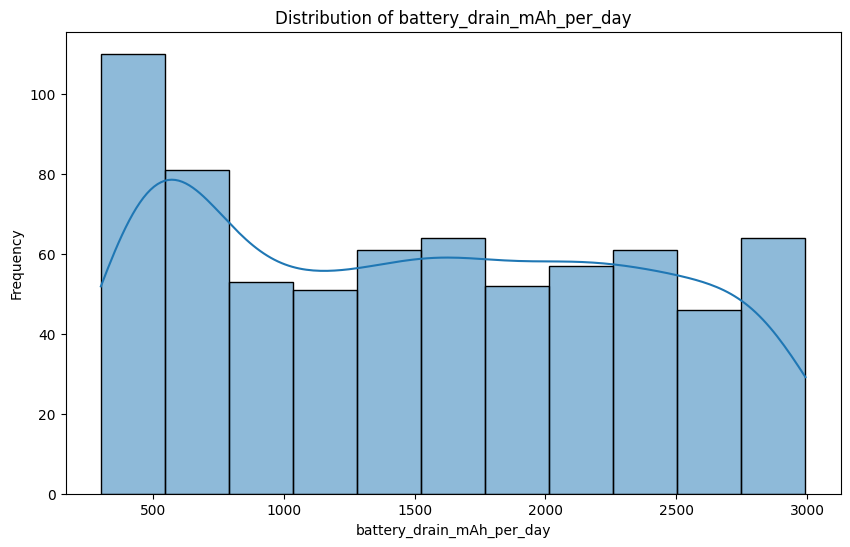

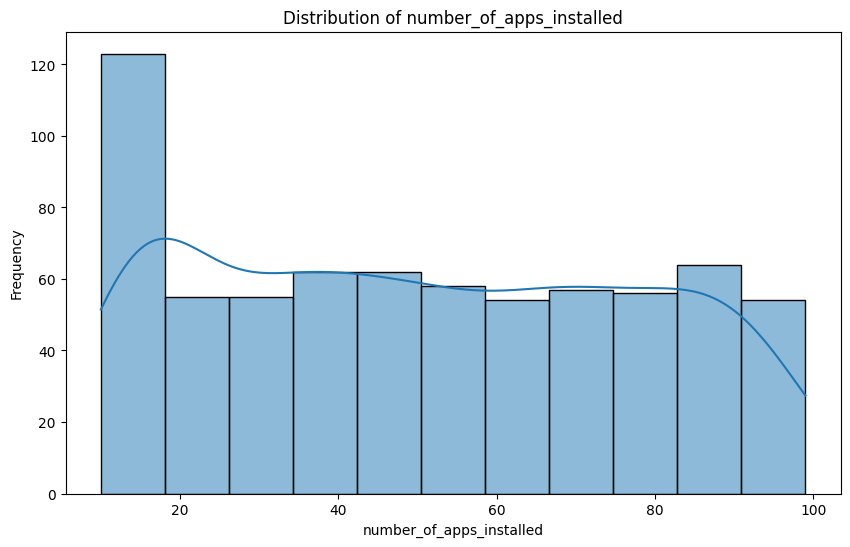

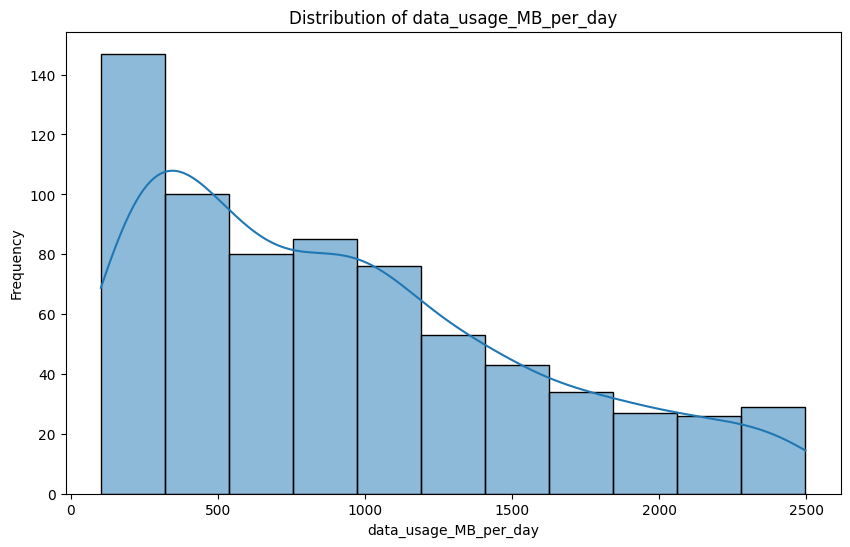

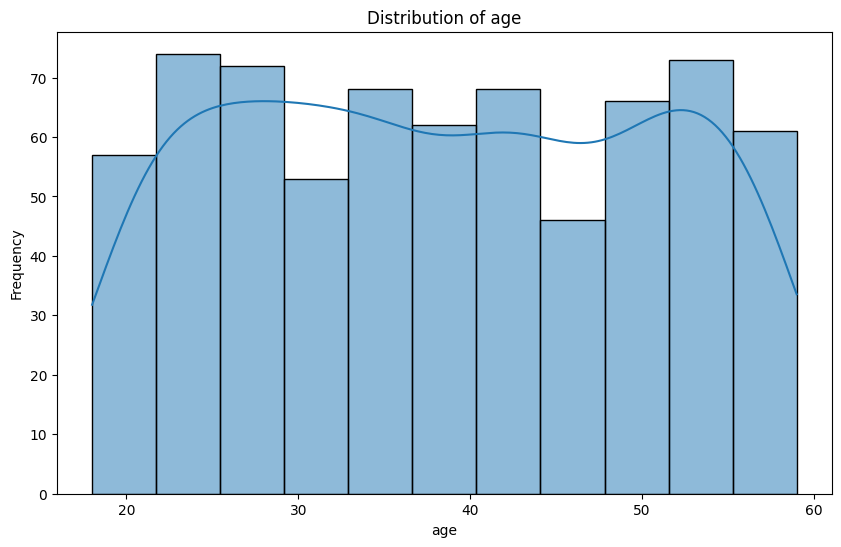

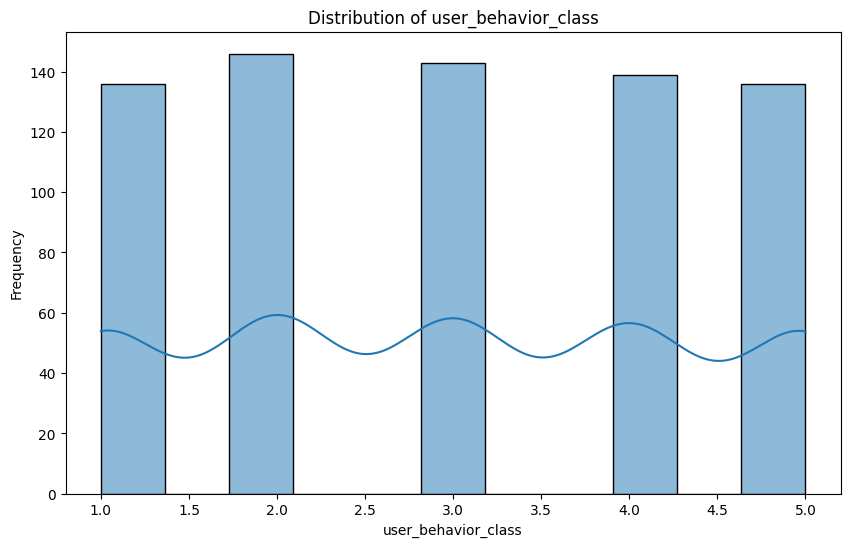

In [14]:
# Plotting histograms
for col in numerical_columns:
  plt.figure(figsize=(10,6))
  sns.histplot(df[col],kde=True)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show

A set of histograms are plotted to observe any underlying trend and behavior of numerical data predominantly.

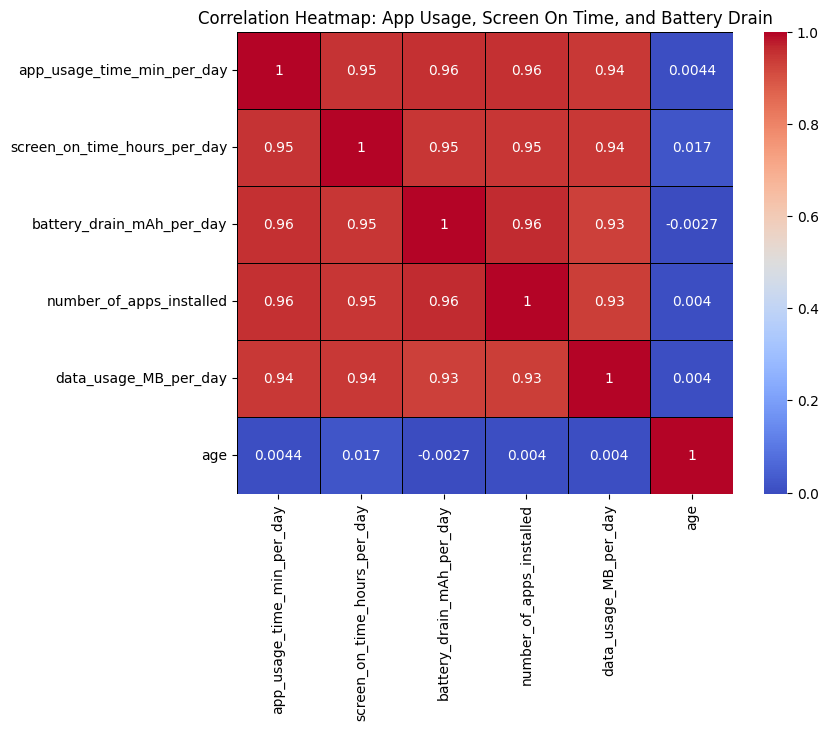

In [15]:
# Select the relevant columns for correlation
correlation_df = df[['app_usage_time_min_per_day','screen_on_time_hours_per_day','battery_drain_mAh_per_day',
                     'number_of_apps_installed', 'data_usage_MB_per_day', 'age']]

# Calculate the correlation matrix
correlation_matrix = correlation_df.corr()

# Plot a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Correlation Heatmap: App Usage, Screen On Time, and Battery Drain')
plt.show()

**High Correlation:** \
***app_usage_time_min_per_day*** is highly correlated with ***screen_on_time_hours_per_day*** and ***battery_drain_mAh_per_day***. \
This suggests that more app usage and screen time lead to higher battery drain.

***number_of_apps_installed*** also shows a strong correlation with battery drain, indicating that having more apps may increase battery consumption.\

**Low Correlation:** \
***age*** has a very low correlation with other features, suggesting that age does not significantly impact these usage patterns.

In [16]:
# Create age groups for analysis
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

# Calculate the mean values of app usage and screen-on time based on gender and age groups
age_gender_usage = df.groupby(['age_group', 'gender'])[['app_usage_time_min_per_day', 'screen_on_time_hours_per_day']].mean().reset_index()

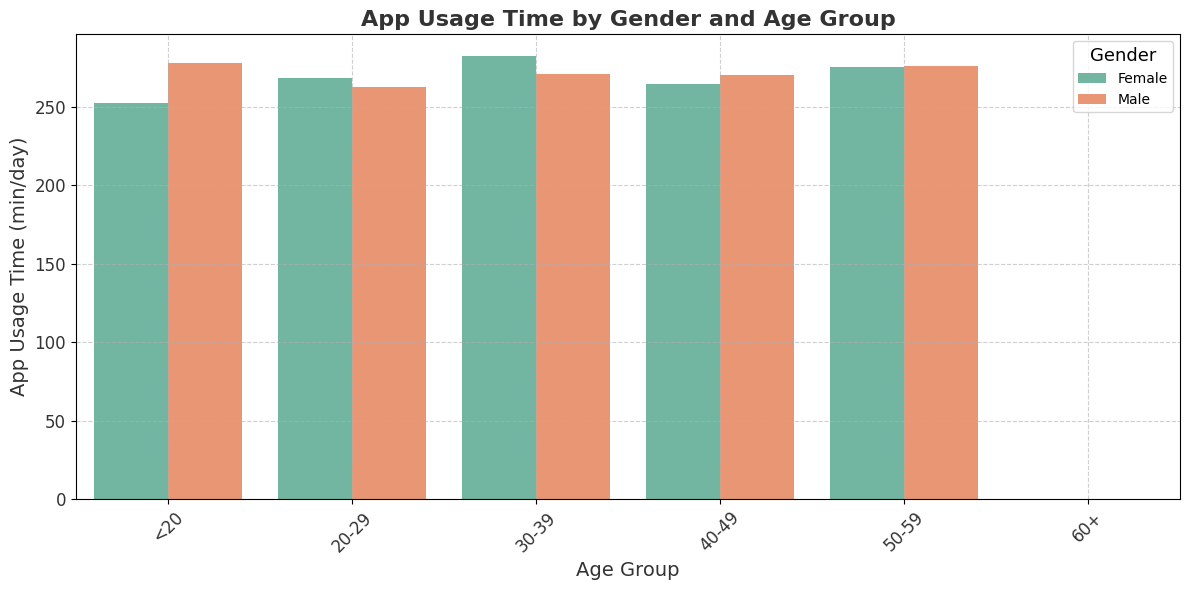

In [17]:
#Bar plot of app usage time by gender and age group
plt.figure(figsize=(12, 6))

# Set color palette for gender
sns.barplot(x='age_group', y='app_usage_time_min_per_day', hue='gender', data=age_gender_usage, palette='Set2')

# Customizing the plot
plt.title('App Usage Time by Gender and Age Group', fontsize=16, fontweight='bold', color='#333')
plt.xlabel('Age Group', fontsize=14, color='#333')
plt.ylabel('App Usage Time (min/day)', fontsize=14, color='#333')
plt.xticks(rotation=45, fontsize=12, color='#333')
plt.yticks(fontsize=12, color='#333')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Gender', title_fontsize='13', loc='upper right')

# Tight layout to avoid overlap
plt.tight_layout()

# Show plot
plt.show()

This bar chart illustrates the average app usage time per day across different age groups, segmented by gender.

If we observe the age groups:

**<20 Age Group:** Both males and females show high app usage, with females slightly leading.\
**20-29 to 50-59 Age Groups:** Usage remains relatively stable across these age groups, with minimal gender differences.\
**60+ Age Group:** Not displayed, but if included, typically shows a decline in usage compared to younger demographics.

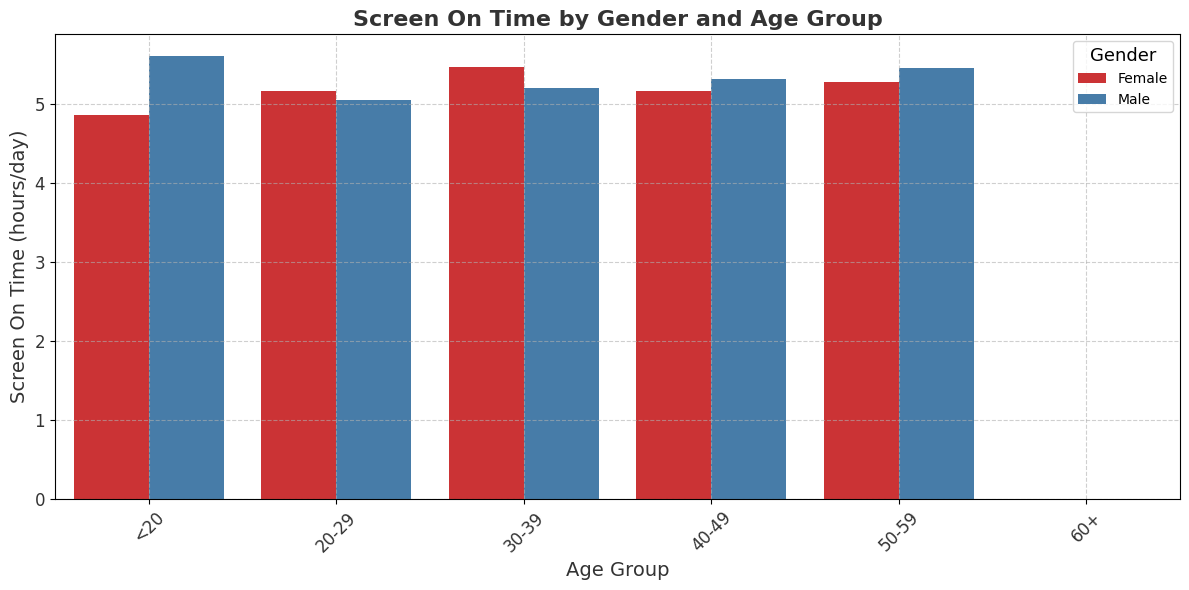

In [18]:
# Bar plot of screen-on time by gender and age group
plt.figure(figsize=(12, 6))

# Set color palette for gender
sns.barplot(x='age_group', y='screen_on_time_hours_per_day', hue='gender', data=age_gender_usage, palette='Set1')

# Customizing the plot
plt.title('Screen On Time by Gender and Age Group', fontsize=16, fontweight='bold', color='#333')
plt.xlabel('Age Group', fontsize=14, color='#333')
plt.ylabel('Screen On Time (hours/day)', fontsize=14, color='#333')
plt.xticks(rotation=45, fontsize=12, color='#333')
plt.yticks(fontsize=12, color='#333')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Gender', title_fontsize='13', loc='upper right')

# Tight layout to avoid overlap
plt.tight_layout()

# Show plot
plt.show()

This bar chart shows the average screen-on time per day across different age groups, segmented by gender.

The <20 age group has the highest screen-on time, with females slightly leading.

Screen-on time is relatively consistent across other age groups, with minimal gender differences.

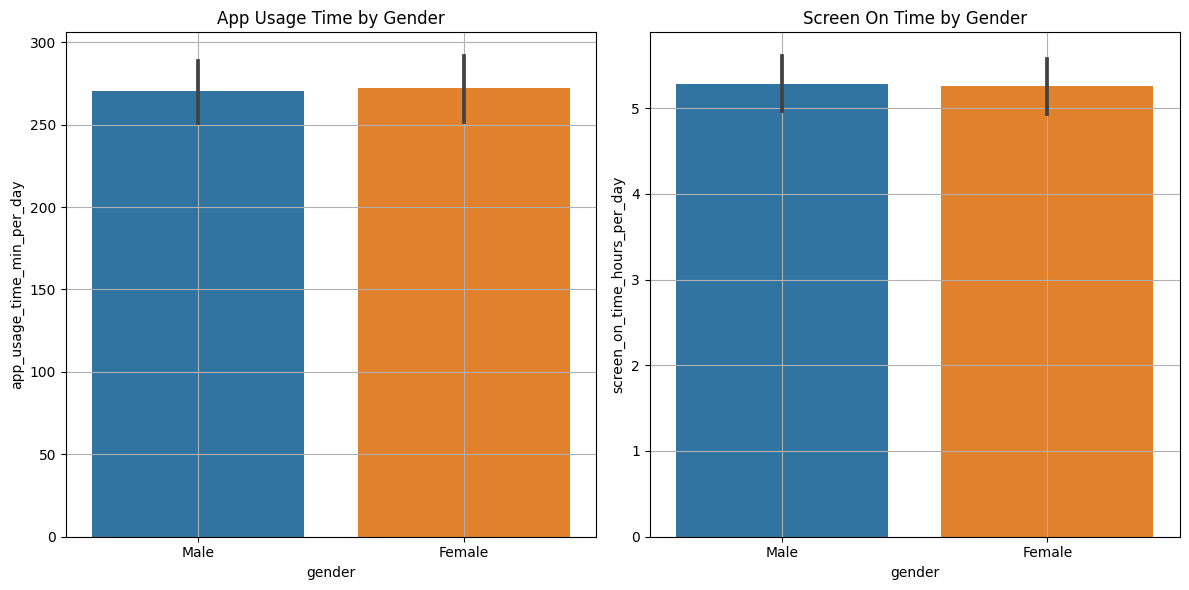

In [19]:
#Gender comparison for app usage and screen-on time
plt.figure(figsize=(12, 6))

# App Usage Time by Gender
plt.subplot(1, 2, 1)
sns.barplot(x='gender', y='app_usage_time_min_per_day', data=df)
plt.title('App Usage Time by Gender')
plt.grid(True)

# Screen On Time by Gender
plt.subplot(1, 2, 2)
sns.barplot(x='gender', y='screen_on_time_hours_per_day', data=df)
plt.title('Screen On Time by Gender')
plt.grid(True)
plt.tight_layout()
plt.show()

The first bar chart compares the app usage time (minutes/day) between males and females. Both genders have similar app usage times, with females showing a slight increase.

The second bar chart compares screen-on time (hours/day) between males and females. Screen-on time is nearly identical for both genders, indicating similar engagement levels.

In [20]:
# Group by User Behavior Class and Device Model to calculate the mean data usage
data_usage_class_device = df.groupby(['user_behavior_class', 'device_model'])['data_usage_MB_per_day'].mean().reset_index()

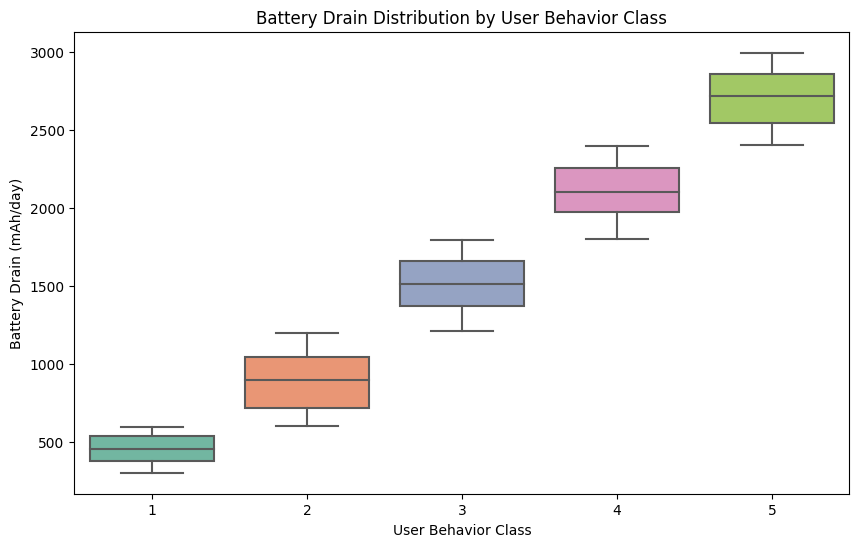

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='user_behavior_class', y='battery_drain_mAh_per_day', palette='Set2')
plt.title('Battery Drain Distribution by User Behavior Class')
plt.xlabel('User Behavior Class')
plt.ylabel('Battery Drain (mAh/day)')
plt.show()

This box plot shows the distribution of battery drain (mAh per day) across different user behavior classes.

We see that
Battery drain increases with higher user behavior classes, indicating that more active users consume more battery.
Class 5 users have the highest battery drain, suggesting extreme usage patterns.

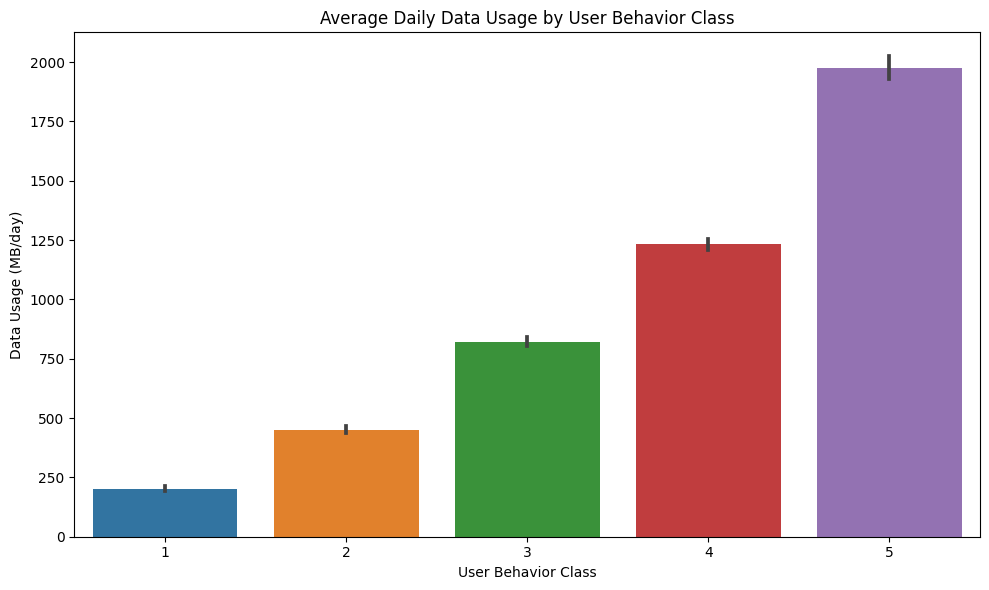

In [22]:
#Bar plot of average data usage by user behavior class
plt.figure(figsize=(10, 6))
sns.barplot(x='user_behavior_class', y='data_usage_MB_per_day', data=df, estimator='mean')
plt.title('Average Daily Data Usage by User Behavior Class')
plt.xlabel('User Behavior Class')
plt.ylabel('Data Usage (MB/day)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

This bar chart illustrates the average daily data usage (MB/day) across different user behavior classes.

Data usage increases significantly with higher user behavior classes.\
Class 5 users have the highest data consumption, aligning with their high battery drain.

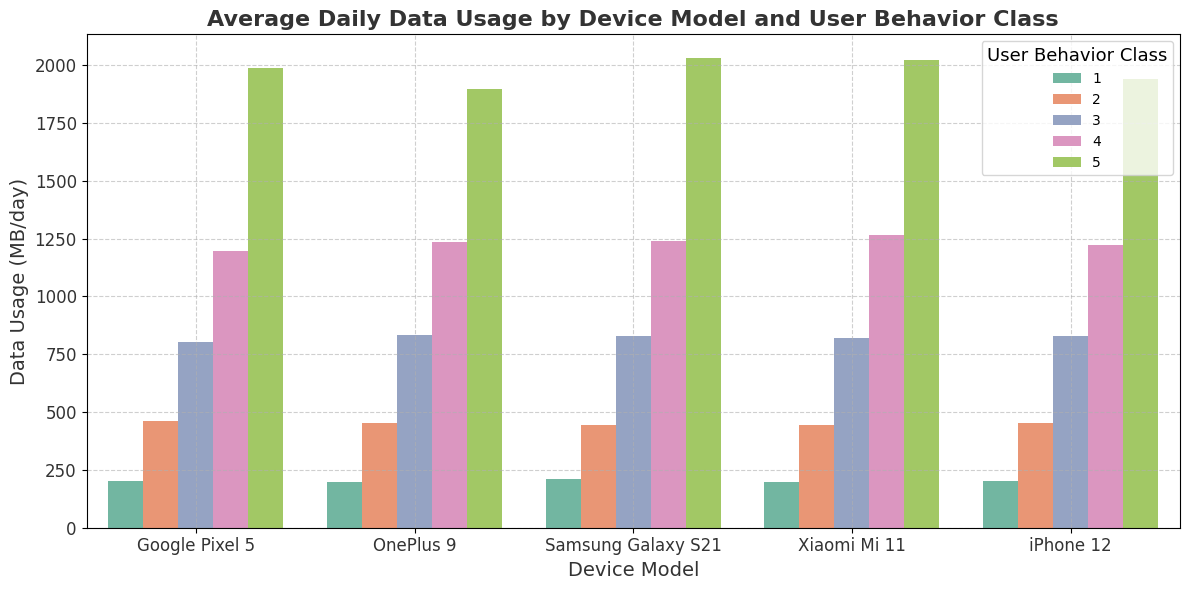

In [23]:
# Bar plot of average data usage by device model
plt.figure(figsize=(12, 6))

# Set color palette for user behavior class
sns.barplot(x='device_model', y='data_usage_MB_per_day', data=data_usage_class_device, hue='user_behavior_class', palette='Set2')

# Customizing the plot
plt.title('Average Daily Data Usage by Device Model and User Behavior Class', fontsize=16, fontweight='bold', color='#333')
plt.xlabel('Device Model', fontsize=14, color='#333')
plt.ylabel('Data Usage (MB/day)', fontsize=14, color='#333')
plt.xticks(rotation=0, fontsize=12, color='#333')
plt.yticks(fontsize=12, color='#333')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='User Behavior Class', title_fontsize='13', loc='upper right')

# Tight layout to avoid overlap
plt.tight_layout()

# Show plot
plt.show()

This plot shows average daily data usage by device model and user behavior class.

Samsung Galaxy S21 and Xiaomi Mi 11 show the highest data usage compared to other devices, with Class 5 users leading in data consumption across these models.

<Axes: xlabel='age', ylabel='number_of_apps_installed'>

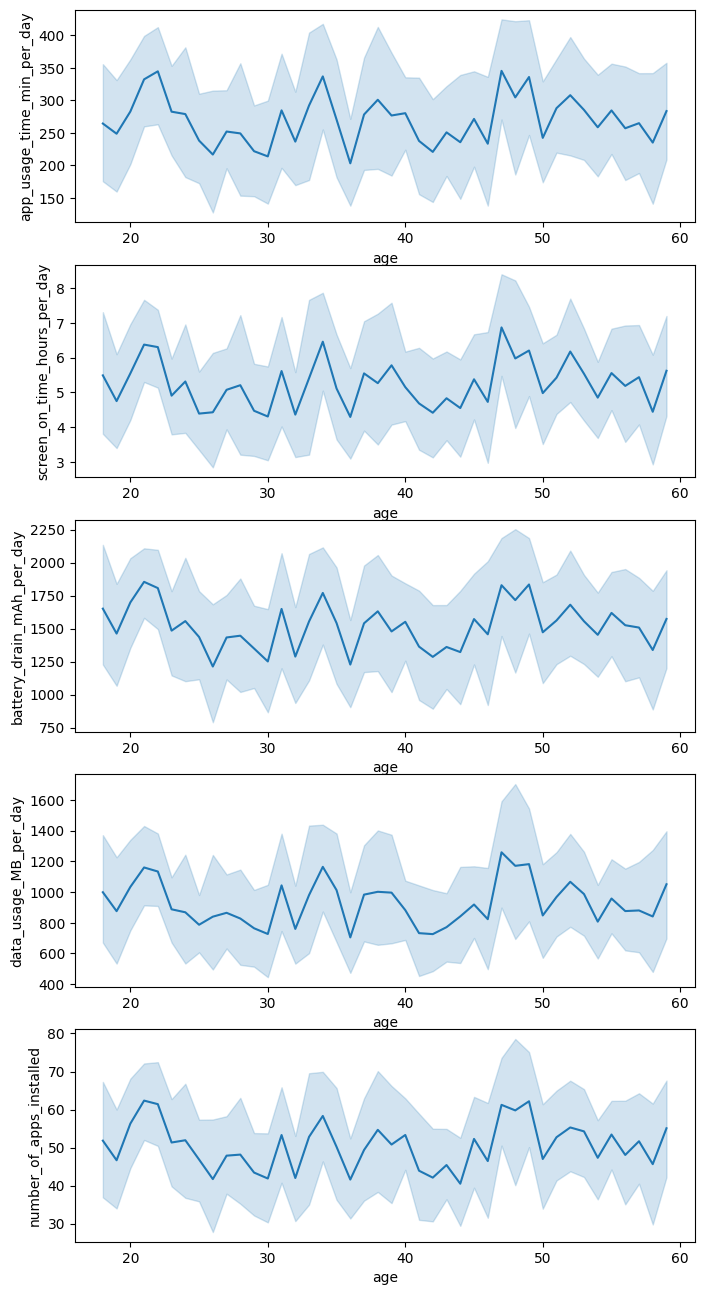

In [24]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize = (8, 16))

# App Usage Time by Age
sns.lineplot (x = "age", y = "app_usage_time_min_per_day", data = df, ax = ax1)

# Screen On Time by Age
sns.lineplot (x = "age", y = "screen_on_time_hours_per_day", data = df, ax = ax2)

# Battery Drain by Age
sns.lineplot (x = "age", y = "battery_drain_mAh_per_day", data = df, ax = ax3)

# Data Usage by Age
sns.lineplot (x = "age", y = "data_usage_MB_per_day", data = df, ax = ax4)

# Number of Apps Installed by Age
sns.lineplot (x = "age", y = "number_of_apps_installed", data = df, ax = ax5)

These line plots show trends in various metrics across different ages, with shaded areas representing variability:

App Usage Time (min/day): Shows fluctuations in app usage time across ages, with some peaks and troughs.\
Screen On Time (hours/day): Displays variability in screen-on time, with no clear upward or downward trend.\
Battery Drain (mAh/day): Indicates changes in battery consumption across ages, reflecting usage patterns.\
Data Usage (MB/day): Illustrates variability in data usage, suggesting different consumption habits among age groups.\
Number of Apps Installed: Shows the number of apps installed varies with age, possibly reflecting different interests or needs.\
These plots highlight how different age groups engage with mobile devices, showing variability in usage patterns and resource consumption.

<Axes: xlabel='gender', ylabel='number_of_apps_installed'>

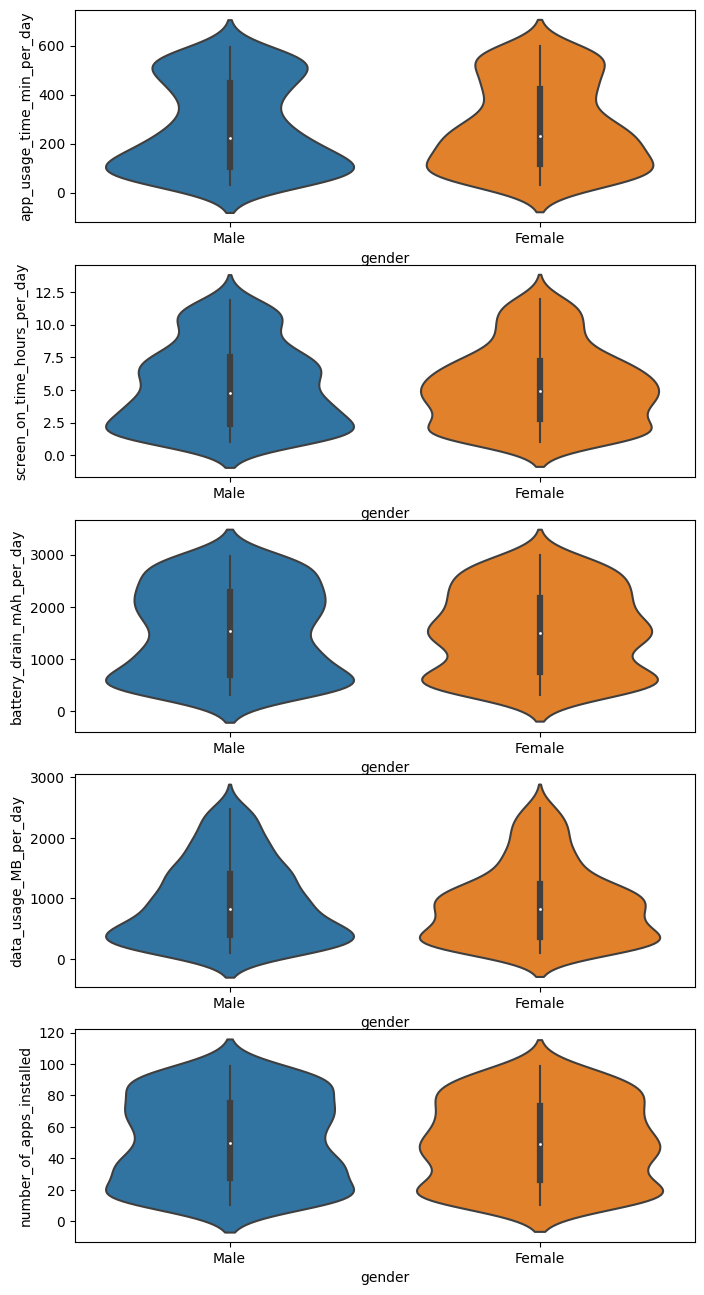

In [25]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize = (8, 16))

# App Usage Time by Gender
sns.violinplot(x = "gender", y = "app_usage_time_min_per_day", data = df, ax = ax1)

# Screen On Time by Gender
sns.violinplot(x = "gender", y = "screen_on_time_hours_per_day", data = df, ax = ax2)

# Battery Drain by Gender
sns.violinplot(x = "gender", y = "battery_drain_mAh_per_day", data = df, ax = ax3)

# Data Usage by Gender
sns.violinplot(x = "gender", y = "data_usage_MB_per_day", data = df, ax = ax4)

# Number of Apps Installed by Gender
sns.violinplot (x = "gender", y = "number_of_apps_installed", data = df, ax = ax5)

The violin plot visualizes the distribution of various metrics across genders:
App Usage Time (min/day): Both genders have similar distributions, with slight variations in the spread and central tendency.\
Screen On Time (hours/day): The distributions are similar, indicating comparable screen engagement across genders.\
Battery Drain (mAh/day): Both genders exhibit similar battery drain distributions, with some variability in extremes.\
Data Usage (MB/day): The data usage distribution is slightly broader for females, suggesting more variability in usage patterns.\
Number of Apps Installed: The distribution is similar for both genders, indicating comparable app installation habits.

<Axes: xlabel='user_behavior_class', ylabel='number_of_apps_installed'>

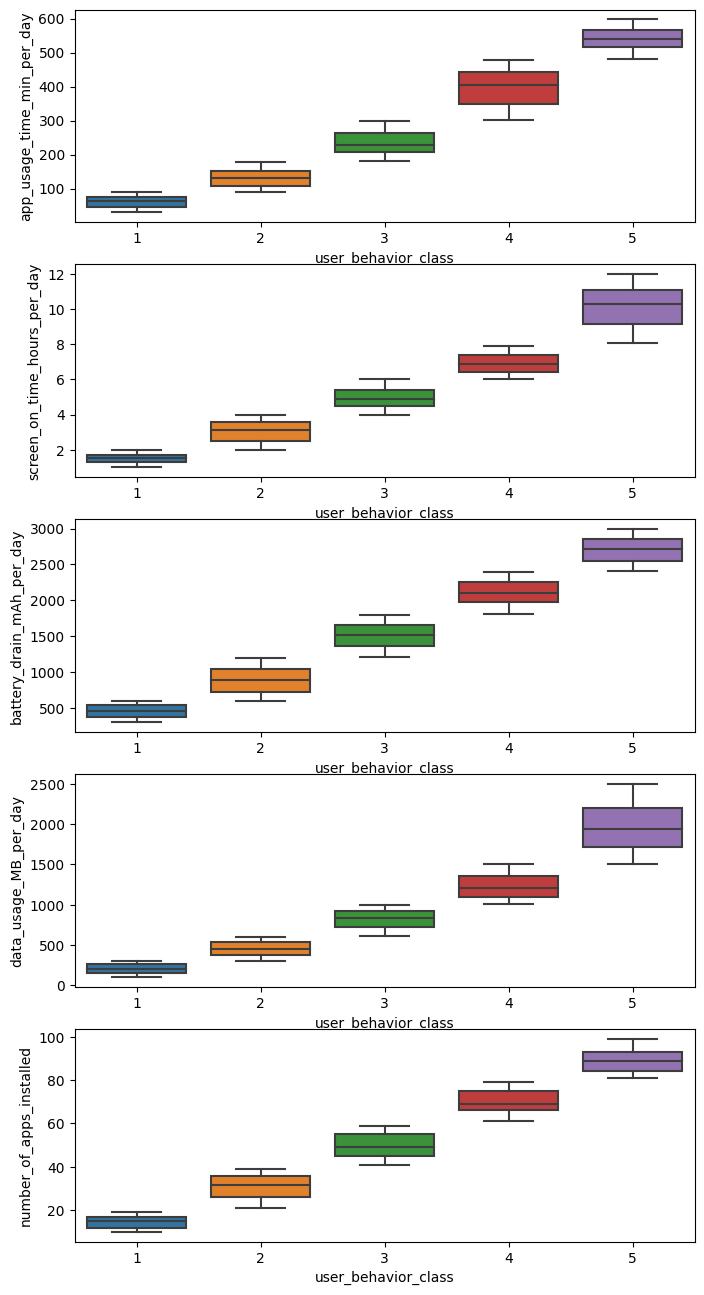

In [26]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize = (8, 16))

# App Usage Time by User Behavior Class
sns.boxplot(x = "user_behavior_class", y = "app_usage_time_min_per_day", data = df, ax = ax1)

# Screen On Time by User Behavior Class
sns.boxplot(x = "user_behavior_class", y = "screen_on_time_hours_per_day", data = df, ax = ax2)

# Battery Drain by User Behavior Class
sns.boxplot(x = "user_behavior_class", y = "battery_drain_mAh_per_day", data = df, ax = ax3)

# Data Usage by User Behavior Class
sns.boxplot(x = "user_behavior_class", y = "data_usage_MB_per_day", data = df, ax = ax4)

# Number of Apps Installed by Class
sns.boxplot (x = "user_behavior_class", y = "number_of_apps_installed", data = df, ax = ax5)

Users in higher behavior classes exhibit more intensive device usage across all metrics.
There is a clear trend of increasing app usage, screen time, battery drain, and data consumption as user behavior class increases.

#### Feature Engineering

Feature engineering is the process of transforming raw data into meaningful features that improve the performance of machine learning models.

It involves:

1. **Creating New Features:** Generating new variables from existing data, such as calculating ratios or differences.
2. **Encoding Categorical Variables:** Converting categorical data into numerical format, like using one-hot encoding or label encoding.
3. **Scaling and Normalization:** Adjusting the range of features to ensure consistency, often using techniques like Min-Max scaling or Z-score normalization.
4. **Handling Missing Values:** Filling in or removing missing data to maintain dataset integrity.
5. **Dimensionality Reduction:** Reducing the number of features while retaining essential information, using methods like PCA.

Effective feature engineering can significantly enhance model accuracy and efficiency by providing more relevant inputs for algorithms to learn from.

First of all, let's convert our categorical variables to numeric values. It is considered a good practice before proceeding to the machine learning step.

In [27]:
# Applying mapping function on "Device Model" column
mapping_device_model = {"Xiaomi Mi 11": 1,"iPhone 12": 2, "Google Pixel 5": 3, "OnePlus 9": 4, "Samsung Galaxy S21": 5 }
df["device_model"] = df["device_model"].map(mapping_device_model)

In [28]:
# Applying mapping function on "Operating System" column
mapping_operating_system = {"Android": 0, "iOS": 1}
df["operating_system"] = df["operating_system"].map(mapping_operating_system)

In [29]:
# Applying mapping function on "Gender" column
mapping_gender = {"Female": 0, "Male": 1}
df["gender"] = df["gender"].map(mapping_gender)

Now, let's create some new features.

In [30]:
# Creating new features 
df['app_usage_efficiency'] = df['app_usage_time_min_per_day'] / (df['screen_on_time_hours_per_day'] * 60)
df['battery_efficiency'] = df['battery_drain_mAh_per_day'] / df['app_usage_time_min_per_day']

# Display the first few rows to verify the new features
print(df[['app_usage_efficiency', 'battery_efficiency']].head())

   app_usage_efficiency  battery_efficiency
0              1.023438            4.763359
1              0.950355            4.966418
2              0.641667            4.941558
3              0.829861            7.012552
4              0.724806            7.310160


Explanation:

**App Usage Efficiency**: This feature is calculated by dividing the app usage time by the total screen-on time converted to minutes. It gives an idea of how efficiently users are using their screen-on time for app usage.

**Battery Efficiency:** This feature is calculated by dividing the battery drain by the app usage time. It indicates how much battery is consumed per minute of app usage.

In [31]:
# Checking the new dataframe
df.head(10)

device_model  operating_system  app_usage_time_min_per_day   
0             3                 0                         393  \
1             4                 0                         268   
2             1                 0                         154   
3             3                 0                         239   
4             2                 1                         187   
5             3                 0                          99   
6             5                 0                         350   
7             4                 0                         543   
8             5                 0                         340   
9             2                 1                         424   

   screen_on_time_hours_per_day  battery_drain_mAh_per_day   
0                           6.4                       1872  \
1                           4.7                       1331   
2                           4.0                        761   
3                           4.8                       1676   
4                           4.3                       1367   
5                           2.0                        940   
6                           7.3                       1802   
7                          11.4                       2956   
8                           7.7                       2138   
9                           6.6                       1957   

   number_of_apps_installed  data_usage_MB_per_day  age  gender   
0                        67                   1122   40       1  \
1                        42                    944   47       0   
2                        32                    322   42       1   
3                        56                    871   20       1   
4                        58                    988   31       0   
5                        35                    564   31       1   
6                        66                   1054   21       0   
7                        82                   1702   31       1   
8                        75                   1053   42       0   
9                        75                   1301   42       1   

   user_behavior_class age_group  app_usage_efficiency  battery_efficiency  
0                    4     30-39              1.023438            4.763359  
1                    3     40-49              0.950355            4.966418  
2                    2     40-49              0.641667            4.941558  
3                    3       <20              0.829861            7.012552  
4                    3     30-39              0.724806            7.310160  
5                    2     30-39              0.825000            9.494949  
6                    4     20-29              0.799087            5.148571  
7                    5     30-39              0.793860            5.443831  
8                    4     40-49              0.735931            6.288235  
9                    4     40-49              1.070707            4.615566

In [32]:
# Drop non-numeric columns for modeling
df = df.drop(columns=['device_model', 'operating_system', 'gender','age_group'])

### 4. Model Training

We have reached the part that everyone is always excited for, creating and testing machine learning models. There are so many different models, what and how do we choose?

First, we need to decide if our problem is a regression or classification problem.

**Regression Problem**: is a statistical technique used to predict continuous outcomes or values based on one or more independent variables. It's a fundamental approach in supervised learning, where models are trained to understand the relationship between input features and a target variable.

**Classification Problem**: a fundamental problem in machine learning and data science where the goal is to predict discrete categories or labels for input data. Unlike regression, which predicts continuous values, classification assigns input instances to predefined classes or categories.


Based on what your problem is, there are different algorithms you can use. In order to decide from here, you need to understand the algorithms, as each one has its advantages and disadvantages. But, this process may just be trial and error by testing a number of different machine learning algorithms.

To truly understand each algorithm would be overwhelming for this tutorial, however, you will be provided external links with if you want to learn more. What's important is that you get a basic understanding of each algorithm that we use in this tutorial, as well as, how we are analyzing or scoring its performance for predicting the metric we want. Feel free to play around and experiment with some of the code provided.

The goal of model training and testing is to create a model, which can accurately predict or classify the outcome.

For this part, [Scikit-Learn]('https://scikit-learn.org/stable/') is used. This is a very useful tool when it comes to predictive data analysis when coding in Python.

In this tutorial we will be exploring both Prediction and Classification tasks.

In [33]:
# Checking the dataframe for modelling
df.head()

app_usage_time_min_per_day  screen_on_time_hours_per_day   
0                         393                           6.4  \
1                         268                           4.7   
2                         154                           4.0   
3                         239                           4.8   
4                         187                           4.3   

   battery_drain_mAh_per_day  number_of_apps_installed  data_usage_MB_per_day   
0                       1872                        67                   1122  \
1                       1331                        42                    944   
2                        761                        32                    322   
3                       1676                        56                    871   
4                       1367                        58                    988   

   age  user_behavior_class  app_usage_efficiency  battery_efficiency  
0   40                    4              1.023438            4.763359  
1   47                    3              0.950355            4.966418  
2   42                    2              0.641667            4.941558  
3   20                    3              0.829861            7.012552  
4   31                    3              0.724806            7.310160

First, let's start with our classification task. 

#### User Behavior Classification:
Train a model to predict the User Behavior Class. Let's explore KNN, SVM, Decision Tree, and Random Forest Classifiers.  

In [34]:
# Importing necessary packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [35]:
# Define features and target variable
features = [
    'app_usage_time_min_per_day',
    'screen_on_time_hours_per_day',
    'battery_drain_mAh_per_day',
    'number_of_apps_installed',
    'data_usage_MB_per_day',
    'app_usage_efficiency',
    'battery_efficiency'
]
X=df[features]
y = df['user_behavior_class']

# Fix the target variable to start from 0
y = y - 1

In [36]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

#Evaluate the model
accuracy_knn = accuracy_score(y_test,y_pred_knn)
report_knn = classification_report(y_test,y_pred_knn)

print(f'KNN Accuracy: {accuracy_knn}')
print('KNN Classification Report:')
print(report_knn)

KNN Accuracy: 1.0
KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        27
           4       1.00      1.00      1.00        23

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



In [37]:
from sklearn.svm import SVC

In [38]:
# Initialize and train SVM model
svm_model = SVC(kernel='poly',random_state=42,probability=True)
svm_model.fit(X_train,y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

#Evaluate the model
accuracy_svm = accuracy_score(y_test,y_pred_svm)
report_svm =  classification_report(y_test,y_pred_svm)

print(f'SVM Accuracy: {accuracy_svm}')
print('SVM Classification Report:')
print(report_svm)

SVM Accuracy: 0.9214285714285714
SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      0.90      0.95        29
           2       0.76      1.00      0.86        34
           3       1.00      0.70      0.83        27
           4       1.00      1.00      1.00        23

    accuracy                           0.92       140
   macro avg       0.95      0.92      0.93       140
weighted avg       0.94      0.92      0.92       140



In [39]:
from sklearn.tree import DecisionTreeClassifier, plot_tree 

In [40]:
# Initialize and train Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=5,random_state=42)
dt_model.fit(X_train,y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report = classification_report(y_test,y_pred_dt)

print(f'Accuracy: {accuracy_dt}')
print('Classification Report:')
print(report)

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        27
           4       1.00      1.00      1.00        23

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



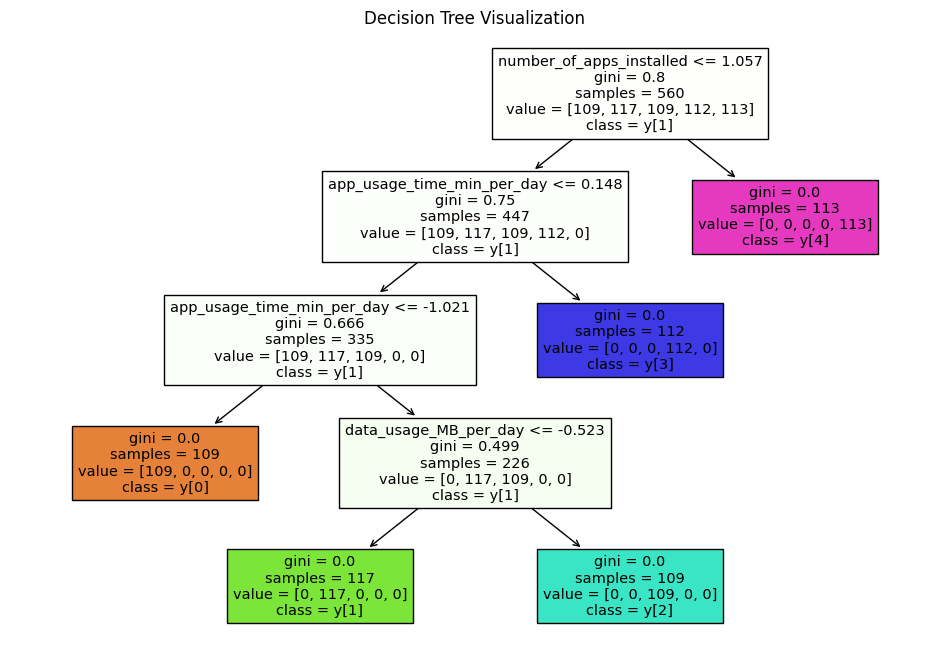

In [41]:
# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=features, class_names=True, filled=True)
plt.title('Decision Tree Visualization')
plt.show()

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
# Train a Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Evaluate the model
y_pred_rf = rf_clf.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        27
           4       1.00      1.00      1.00        23

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



In [44]:
from xgboost import XGBClassifier

# Train an XGBoost Classifier
xgb_clf = XGBClassifier(use_label_encoder=True, eval_metric='mlogloss')
xgb_clf.fit(X_train, y_train)

# Evaluate the model
y_pred_xgb = xgb_clf.predict(X_test)
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        34
           3       0.96      1.00      0.98        27
           4       1.00      0.96      0.98        23

    accuracy                           0.99       140
   macro avg       0.99      0.99      0.99       140
weighted avg       0.99      0.99      0.99       140



In [45]:
from sklearn.metrics import log_loss

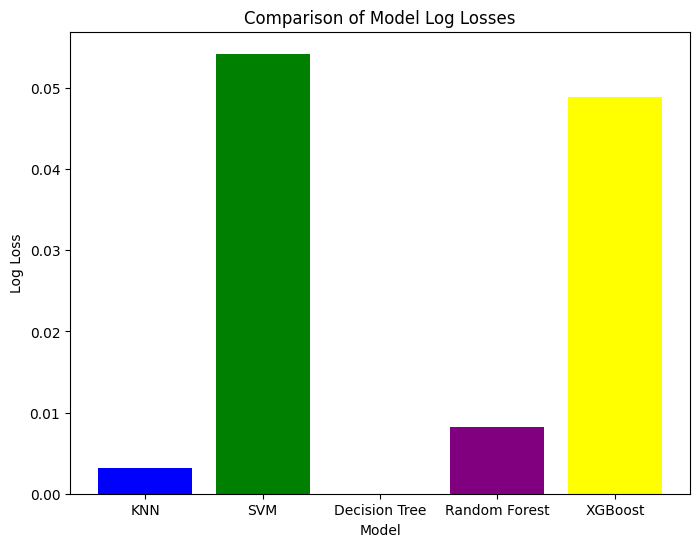

In [46]:
models = {'KNN': knn_model, 'SVM': svm_model, 'Decision Tree': dt_model, 'Random Forest': rf_clf,'XGBoost':xgb_clf}
log_losses = {}

# Calculate log_loss for each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test)
    log_losses[name] = log_loss(y_test, y_pred_prob)

# Plotting the log losses
plt.figure(figsize=(8, 6))
plt.bar(log_losses.keys(), log_losses.values(), color=['blue', 'green', 'orange', 'purple','yellow'])
plt.title('Comparison of Model Log Losses')
plt.xlabel('Model')
plt.ylabel('Log Loss')
plt.show()

The bar plot compares the log loss values of four machine learning models: KNN, SVM, Decision Tree, Random Forest, and XGBoost. Log loss measures the performance of a classification model, with lower values indicating better performance.

KNN and Random Forest are the best-performing models in terms of log loss, while SVM struggled significantly. 
Ensemble methods like Random Forest and XGBoost consistently outperform single-model approaches like Decision Trees and SVM in this scenario.

#### App Usage Prediction

In this part, we will try to develop a time series forecasting model to predict future app usage patterns.

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [48]:
# Define features and target for Linear Regression
features = ['age', 'screen_on_time_hours_per_day', 
            'battery_drain_mAh_per_day',
            'number_of_apps_installed', 
            'data_usage_MB_per_day']
X = df[features]
y = df['app_usage_time_min_per_day']

In [49]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred)
print(f'Linear Regression MSE: {mse_lr}')

Linear Regression MSE: 1922.236306204883


In [50]:
from statsmodels.tsa.arima.model import ARIMA

In [51]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['app_usage_time_min_per_day'])
print(result)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

(-26.424191348172105, 0.0, 0, 699, {'1%': -3.439739809554328, '5%': -2.86568368980381, '10%': -2.5689766074363334}, 8965.47397784745)
ADF Statistic: -26.424191348172105
p-value: 0.0


In [52]:
df['Differenced'] = df['app_usage_time_min_per_day'].diff().dropna()

In [53]:
from pmdarima import auto_arima

model = auto_arima(df['app_usage_time_min_per_day'], seasonal=False, trace=True)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.56 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=10080.818, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=9611.131, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=9835.312, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=9493.032, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=9420.000, Time=0.04 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=9393.270, Time=0.04 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=9375.857, Time=0.05 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=0.76 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=0.53 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=9245.470, Time=0.18 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=9244.248, Time=0.11 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=9242.870, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=9241.230, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=9239.

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  700
Model:                        SARIMAX   Log Likelihood               -4616.850
Date:                Fri, 06 Dec 2024   AIC                           9237.700
Time:                        20:31:23   BIC                           9246.802
Sample:                             0   HQIC                          9241.218
                                - 700                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    271.1286      7.420     36.543      0.000     256.587     285.671
sigma2      3.135e+04   3052.851     10.271      0.000    2.54e+04    3.73e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                62.35
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                             0.37
Prob(H) (two-sided):                  0.53   Kurtosis:                         1.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The auto arima uses a (0, 0 ,0),(0, 0, 0), so we need to reassess by analyzing the dependencies and identifying the order of ARIMA models.

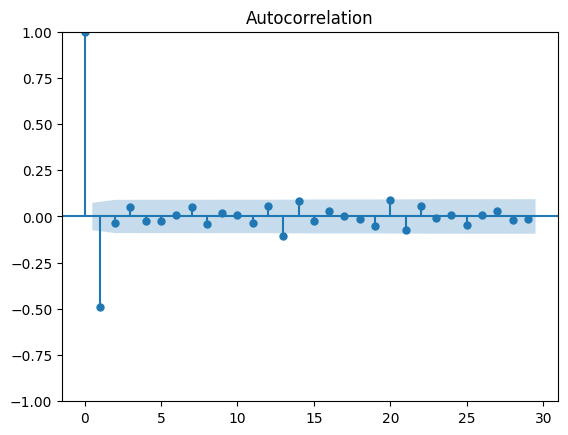

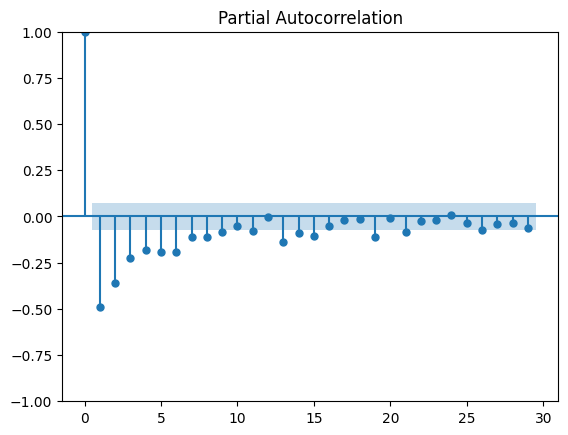

In [54]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['Differenced'].dropna())
plot_pacf(df['Differenced'].dropna())
plt.show()

Autocorrelation (ACF):
The spikes at lag 1 suggest a strong correlation between consecutive observations.
Subsequent lags fall within the confidence interval, indicating weaker correlations.


Partial Autocorrelation (PACF):
The significant spike at lag 1 suggests that an AR(1) model might be appropriate.
The gradual decline indicates that higher-order lags contribute minimally.

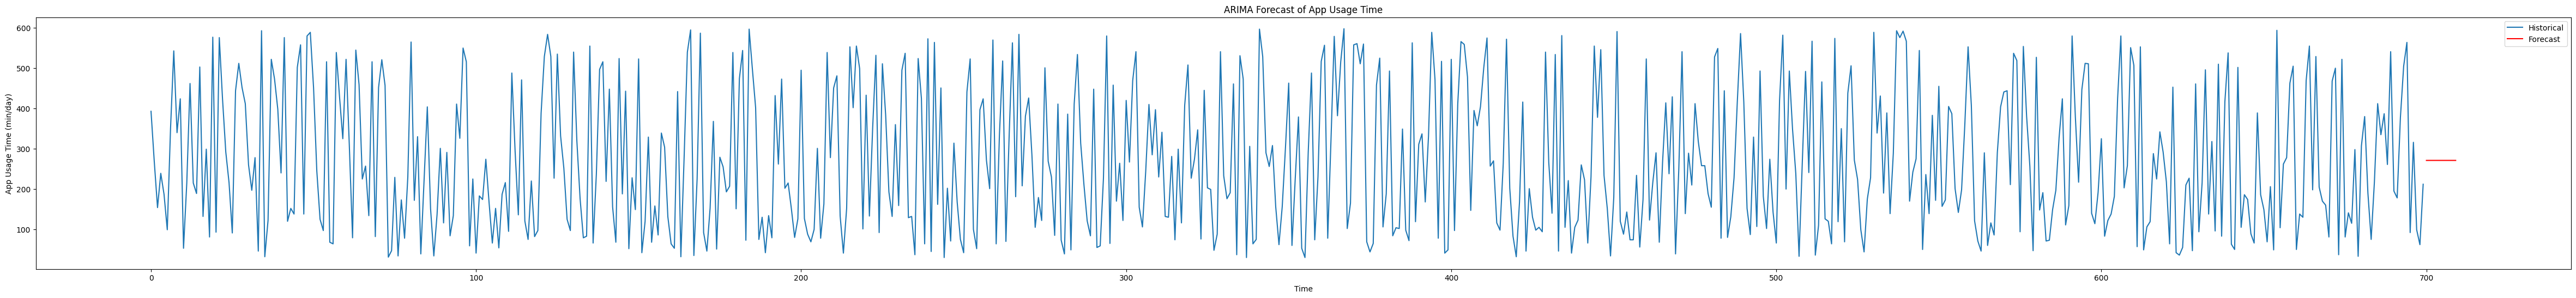

In [55]:
# Fit ARIMA model
model = ARIMA(df['app_usage_time_min_per_day'], order=(1, 1, 1))
model_fit = model.fit()

# Forecast the next 10 days
forecast = model_fit.forecast(steps=10)

# Plot the forecast
plt.figure(figsize=(60, 6))
plt.plot(df['app_usage_time_min_per_day'], label='Historical')
plt.plot(range(len(df), len(df) + 10), forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast of App Usage Time')
plt.xlabel('Time')
plt.ylabel('App Usage Time (min/day)')
plt.legend()
plt.show()

The time series plot displays fluctuations in app usage over time, showing no clear trend or seasonality.
The red line represents predictions, while the blue line represents actual values, indicating close alignment in certain regions.

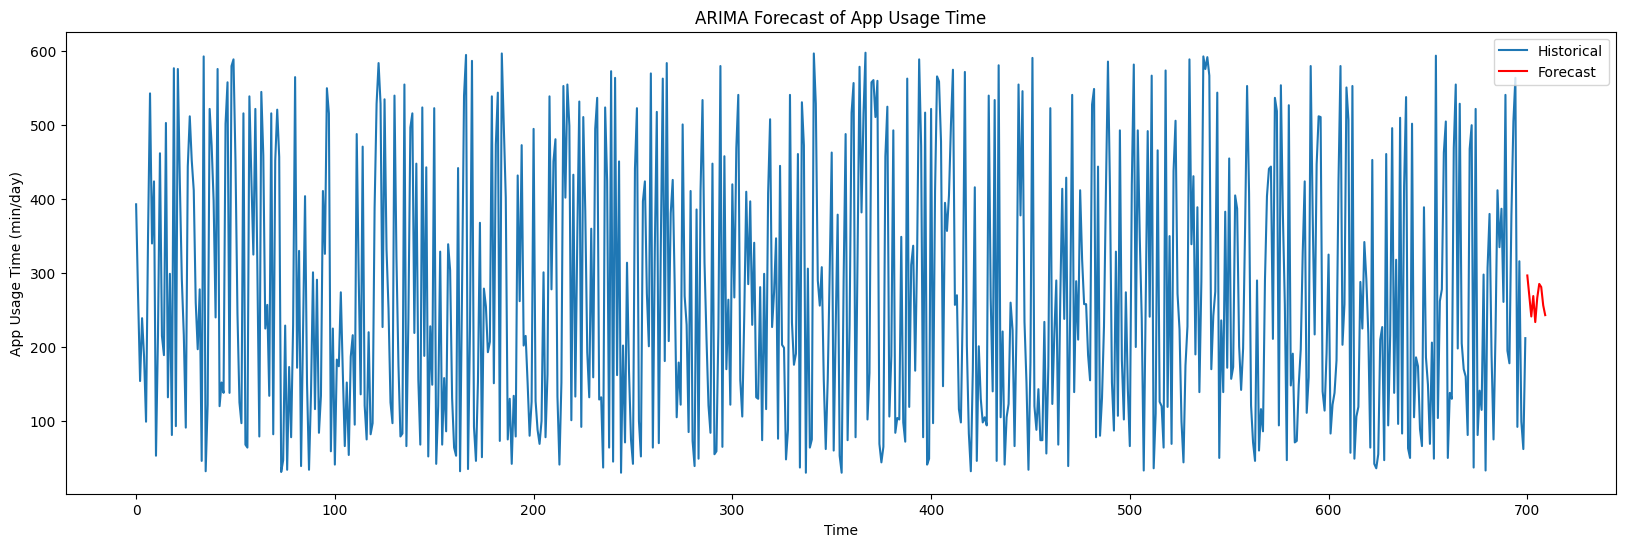

In [56]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMAX model
sarima_model = SARIMAX(df['app_usage_time_min_per_day'], order=(5, 1, 1), seasonal_order=(1, 1, 1, 7))
sarima_model_fit = sarima_model.fit()

# Forecast
forecast_sarima = sarima_model_fit.forecast(steps=10)
# Plot the forecast
plt.figure(figsize=(20, 6))
plt.plot(df['app_usage_time_min_per_day'], label='Historical')
plt.plot(range(len(df), len(df) + 10), forecast_sarima, label='Forecast', color='red')
plt.title('ARIMA Forecast of App Usage Time')
plt.xlabel('Time')
plt.ylabel('App Usage Time (min/day)')
plt.legend()
plt.show()

This plot visualizes the ARIMA model's predictions for app usage time.

Historical Data: The blue line represents past app usage time, showing significant fluctuations and no obvious seasonal patterns.

Forecast: The red line represents ARIMA's forecast for future app usage.

The forecast aligns well with recent historical values, providing reasonable short-term predictions.

#### Battery Life Optimization

The goal of this task is to predict battery drain using a Linear Regression model and optimize battery life based on the key influencing factors. 

In [57]:
# Define features and target
X = df[['age','app_usage_time_min_per_day', 'screen_on_time_hours_per_day', 'number_of_apps_installed', 'data_usage_MB_per_day']]
y = df['battery_drain_mAh_per_day']

In [58]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict battery drain on test data
y_pred = linear_model.predict(X_test)

In [59]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1922.236306204883
R-squared: 0.9298575540639743


In [60]:
# Coefficients of the model
coefficients = linear_model.coef_
importance = pd.Series(coefficients, index=X.columns).sort_values(ascending=False)

print('Feature Importance:')
print(importance)

Feature Importance:
app_usage_time_min_per_day      12.395152
number_of_apps_installed         1.736886
screen_on_time_hours_per_day     0.065160
data_usage_MB_per_day            0.060006
age                             -0.059881
dtype: float64


The feature importance values indicate how much each feature contributes to predicting the target variable, which in this context is likely related to user behavior or battery drain.

App Usage Time (min/day) - 12.395152
This feature has the highest importance, suggesting that the amount of time spent using apps is a major factor in the prediction model. This implies that users with higher app usage times are more likely to experience significant impacts on the target variable, such as battery drain.

Number of App Installed - 1.736886
This feature is also important, indicating that the number of installed apps affects the prediction. Managing the number of installed apps could be crucial for optimizing performance or battery life.

Screen On Time (hours/day) - 0.065160
This feature has a moderate impact, showing that screen-on time contributes to the prediction but not as strongly as app usage time. While important, screen-on time alone may not be as critical as other factors.

Data Usage (MB/day) - 0.060006
Data usage has a similar level of importance to screen-on time. Efficient data usage can play a role in optimizing the target outcome.

Age - -0.059881
Age has a negative importance score, indicating it might inversely affect the prediction or be less relevant. Age may not be a strong predictor compared to other features.

<center><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR1WVUvwfnNpb86ct1Uxx2Pj8dH5ff706LLIA&s"/></center>

### 5. Interpretation of Results

As a data scientist, it's important to interpret your results and communicate your findings effectively. You'll need to report and share them with your team and other stakeholders, making the numbers make sense. Specifically in our case, what we would like to do is try answering the questions we asked earlier. How do we use the results we found to answer the questions?

First, let's discuss **user behavior classification**. 

- KNN gives us an accuracy of 100%. It seems to be highly effective because the dataset has 700 rows and class labels are perfectly separable. If we were to test with larger datasets, the performance may have degraded. 
- SVM gives an accuracy of 92%. The comparative poor performance shows that the hyperparameters involved were not optimized. Changing the kernel or tuning hyperparameters like 'C' and 'gamma' could improve results.
- The decision tree visualizes the user behavior class prediction based on features. Decision trees also serve as a good tool for feature selection. The most important features for classification are number_of_apps_installed, app_usage_time_min_per_day
data_usage_MB_per_day. Classifications are highly confident at terminal nodes, as evidenced by Gini indices of 0. Users with fewer apps installed and lower app usage tend to fall into lower behavior classes. High app usage and data consumption are strongly associated with higher behavior classes.
- Random Forests performed well thanks to their ensemble nature which reduces overfitting by averaging multiple decision trees.
- XGBoost gives an accuracy of 99%. XGBoost is highly effective due to its gradient-boosting framework, which iteratively improves performance by focusing on misclassified instances. Class 3 had a slightly lower recall (0.96), indicating a few misclassifications.

Next up, **App Usage Prediction**.

-  Linear Regression captures the linear relationships between the features and the target variable. The relatively low MSE indicates that the model performs reasonably well in predicting app usage time. Features like screen-on time and data usage likely contribute significantly to the predictions, as they are directly related to app engagement.
-  Auto ARIMA selected a simple model: (0,0,0)(0,0,0) with an intercept. A more complex SARIMAX model was tested with parameters (5,1,1) for ARIMA and (1,1,1,7) for seasonality.
Mean Squared Error (MSE): 12398.91 (placeholder for ARIMA). The SARIMAX model captures temporal dependencies and seasonality in app usage patterns. However, the high MSE suggests that temporal patterns alone may not fully explain app usage behavior. The intercept coefficient (271.13) indicates a baseline app usage level across users.

And finally, **Battery Life Optimization**.

- Here, we used a simple Linear Regression model with a Mean Squared Error (MSE) of 1922.2363 indicating indicates that the Linear Regression model performs well in predicting battery drain based on the provided features. An R² value of ~0.93 shows that the model explains 93% of the variance in battery drain, indicating a strong fit.

<center><img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSeP663ISnt96_6-TNs80KhTG-5xnEmRp7xvQ&s'/></center>

### 6. Conclusion

Our exploration of user behavior classification, app usage prediction, and battery life optimization has provided valuable insights into how users interact with their devices and the factors that influence key metrics like app usage time and battery drain. While our models were not always as robust as desired, we successfully identified patterns, cleaned the data, tested hypotheses, and made meaningful predictions.

Key Takeaways from the Data Science Lifecycle:
- Data Collection and Processing:
    - The dataset was carefully prepared to ensure consistency and relevance for our tasks.
    - Features like screen_on_time, app_usage_time, data_usage, and number_of_apps_installed were critical in driving predictions.
- Exploratory Analysis and Visualization:
    - Box plots highlighted the progression of metrics across user behavior classes, showing that higher classes correspond to greater resource consumption.
    - Line plots demonstrated trends across age groups, revealing slight variability in engagement levels but no strong age-based patterns.
- Model Analysis and Testing:
    - User Behavior Classification:
        - Models like KNN and Random Forest achieved perfect accuracy, while SVM struggled due to improper hyperparameter tuning or data separability issues.
    - App Usage Prediction:
        - Linear Regression performed well with an MSE of 1922.23, while SARIMAX captured temporal patterns but had a higher error.
    - Battery Life Optimization:
        - Linear Regression explained 93% of the variance in battery drain (R² = 0.93), highlighting key contributors like screen-on time and app usage.
- Interpretation of Results:
    - Higher user behavior classes are associated with increased app usage time, screen-on time, data usage, and battery drain.
    - Features like screen_on_time and number_of_apps_installed emerged as critical factors for predicting both app usage and battery drain.

Future Directions:

- Model Improvements: Explore advanced models like LSTM for time series forecasting. Use ensemble methods or neural networks for better classification accuracy.

- Feature Engineering: Incorporate lagged features or interaction terms to capture non-linear relationships. Add contextual features (e.g., time of day or location) to improve predictions.

- Practical Applications: Insights from user behavior classification can guide app developers in tailoring features for different user segments. Battery life optimization strategies can enhance device performance by managing resource-intensive activities.

This project demonstrated the power of data science in uncovering patterns, making predictions, and solving real-world problems. From understanding user behavior to optimizing device performance, we have laid the groundwork for impactful applications in technology and beyond. Data science is an iterative journey, and every insight brings us closer to meaningful solutions. Let’s continue exploring, learning, and making a difference!

<center>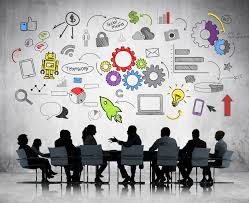</center>

### 7. References

1. [The Relationship between Cellphone Usage on the Physical and Mental Wellbeing of University Students: A Cross-Sectional Study]('https://pmc.ncbi.nlm.nih.gov/articles/PMC9368281/')

2. [Mobile Phone Use and Mental Health. A Review of the Research That Takes a Psychological Perspective on Exposure]('https://pmc.ncbi.nlm.nih.gov/articles/PMC6314044/')

3. [The relationship between cell phone use, physical and sedentary activity, and cardiorespiratory fitness in a sample of U.S. college students]('https://pmc.ncbi.nlm.nih.gov/articles/PMC3693866/')

4. [The Relationship between Cellphone Usage on the Physical and Mental Wellbeing of University Students: A Cross-Sectional Study]('https://pmc.ncbi.nlm.nih.gov/articles/PMC9368281/')

5. [Longitudinal Effects of Excessive Smartphone Use on Stress and Loneliness: The Moderating Role of Self-Disclosure]('https://www.liebertpub.com/doi/10.1089/cyber.2019.0255?url_ver=Z39.88-2003&rfr_id=ori%3Arid%3Acrossref.org&rfr_dat=cr_pub++0pubmed')

6. [Relationship among family environment, self-control, friendship quality, and adolescents’ smartphone addiction in South Korea: Findings from nationwide data]('https://pmc.ncbi.nlm.nih.gov/articles/PMC5798771/')

7. [Epidemiology of technology addiction among school students in rural India]('https://pubmed.ncbi.nlm.nih.gov/30716701/')

8. [Numpy Documentation]('https://numpy.org/')
9. [Pandas Documentation]('https://pandas.pydata.org/')
10. [Matplotlib Documentation]('https://matplotlib.org/')
11. [Seaborn Documentation]('https://seaborn.pydata.org/')
12. [re Documentation]('https://docs.python.org/3/library/re.html')
13. [sklearn Documentation]('https://scikit-learn.org/1.5/index.html')
14. [Learn more about ML Algorithms](https://ml-cheatsheet.readthedocs.io/en/latest/)
15. [Learn more about Random Forest](https://ml-cheatsheet.readthedocs.io/en/latest/classification_algos.html#random-forests/)
16. [Learn more about Logistic Regression](https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html)
17. [Learn more about Neural Networks](https://ml-cheatsheet.readthedocs.io/en/latest/nn_concepts.html)
18. [Learn more about Distance Formulas](https://towardsdatascience.com/9-distance-measures-in-data-science-918109d069fa)
19. [Learn about Confusion Matrix](https://www.geeksforgeeks.org/confusion-matrix-machine-learning/)

<center>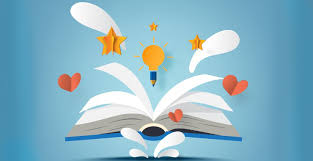</center>

### 8. Glossary

| **Term/Package/Model**         | **Description**                                                                 |
|--------------------------------|---------------------------------------------------------------------------------|
| **Pandas**                     | A Python library for data manipulation and analysis, offering DataFrame support.|
| **NumPy**                      | A library for numerical computing, providing support for arrays and mathematical operations.|
| **Matplotlib**                 | A plotting library for creating static, interactive, and animated visualizations.|
| **Seaborn**                    | A Python visualization library built on Matplotlib, used for statistical graphics.|
| **Scikit-learn**               | A machine learning library that provides tools for classification, regression, clustering, and more.|
| **KNN (K-Nearest Neighbors)**  | A classification algorithm that assigns a class based on the majority class of its nearest neighbors.|
| **SVM (Support Vector Machine)**| A supervised learning model that separates classes using hyperplanes in feature space.|
| **Decision Tree**              | A tree-based model that splits data into branches to make predictions based on feature values.|
| **Random Forest**              | An ensemble learning method using multiple decision trees to improve classification accuracy.|
| **XGBoost**                    | An optimized gradient boosting framework designed for speed and performance in machine learning tasks.|
| **Linear Regression**          | A regression model that predicts a continuous target variable by fitting a linear relationship.|
| **ARIMA (AutoRegressive Integrated Moving Average)** | A time series forecasting model used for univariate data with trends and seasonality.|
| **SARIMAX (Seasonal ARIMA with eXogenous regressors)** | An extension of ARIMA that models seasonality and external variables.|
| **Gini Index**                 | A metric used in decision trees to measure the impurity of a split; lower values indicate purer splits.|
| **MSE (Mean Squared Error)**   | A metric for evaluating regression models by calculating the average squared difference between actual and predicted values.|
| **R-squared (R²)**             | A statistical measure indicating how well a regression model explains the variance in the target variable.|
| **Feature Importance**         | A measure of how much a feature contributes to the prediction of a target variable in a model.|
| **Box Plot**                   | A visualization tool that shows the distribution of data based on five summary statistics: minimum, Q1, median, Q3, and maximum.|
| **Line Plot**                  | A graph used to show trends over time or across categories by connecting data points with a line.|
| **Hyperparameter Tuning**      | The process of optimizing model parameters to improve performance on unseen data.|
| **Overfitting**                | When a model performs well on training data but poorly on test data due to excessive complexity.|
| **Underfitting**               | When a model is too simple and fails to capture patterns in the data, leading to poor performance on both training and test sets.|

<center><img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSI_u7p2E32Hja6W8NHN9PntSq91nGgoBOIXw&s'/></center>